In [66]:
import numpy as np
import scipy as sp
import spiceypy as spice
from scipy import constants
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import jplephem as jpl #jpl spk, open kernal , date -> days
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon, get_body_barycentric_posvel
from astropy.visualization import quantity_support
from astropy import units as u
from jplephem.spk import SPK

In [88]:
#JPL Model of the Solar System
solar_system_ephemeris.set('de430.bsp') #file path
#directory: https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/
solar_bodies = list(solar_system_ephemeris.bodies) #list of bodies, tuple to list
solar_bodies.remove('earth-moon-barycenter')
print("list of bodies:", solar_bodies)

t1 = Time("2020-10-11 23:22")#set the time
t2 = Time("2020-11-11 23:22") 
t3 = Time("2020-12-11 23:22") 

def All_positions(t,bodies=solar_bodies) :
    """
    Returns a list of the positions of all the bodies in the solar system at a given time t, list
    """
    allp = []
    for sb in bodies:
        allp.append(list(get_body_barycentric(sb,t).get_xyz().to_value()))
    return allp

t1pos = All_positions(t1)
t2pos = All_positions(t2)
t3pos = All_positions(t3)


list of bodies: ['sun', 'mercury', 'venus', 'earth', 'moon', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']


In [31]:
#solar_system_ephemeris.set('L2_de431.bsp') 
#solar_bodies = list(solar_system_ephemeris.bodies)
#print(solar_bodies)

In [32]:
#solar_system_ephemeris.bodies 

In [3]:
def PlotStationarySS2d(xs,bodies=solar_bodies,):
    """
    INPUT:
    xs- positions, list
    bodies- list of bodies
    """
    plt.figure(figsize=(20,6)) #The Solar System in the x-y plane
    #Plot the bodies
    for pos in xs:
        i = xs.index(pos)
        plt.plot(pos[0],pos[1],'x',label = bodies[i] )
    plt.legend()
    plt.title('Stationary Solar System')
    #plt.xlim(-0.5e9,7e9)
    plt.show()
    
#PlotStationarySS2d(t1pos)
#PlotStationarySS2d(t2pos)
#PlotStationarySS2d(t3pos)

In [4]:
def PlotStationarySS3d(xs,bodies=solar_bodies,):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection = '3d')
    for pos in xs:
        i = xs.index(pos)
        ax.scatter3D([pos[0]], [pos[1]], [pos[2]], cmap = 'Greens',label = bodies[i])
    plt.legend()
    plt.title('Stationary Solar System')
    plt.show()

#PlotStationarySS3d(t1pos)
#PlotStationarySS3d(t2pos)
#PlotStationarySS3d(t3pos)

In [102]:
#Solar System Orbit F(t)
t_i = Time("2000-09-27 11:11")

def Orbits (ti, d=2, dt=2000, ntdata = 100, bodies = solar_bodies, plot=True, plotvel=True): 
    """
    INPUT: 
    ti - start time in isot
    dt - interval in JD
    ntdata - no. of t data
    bodies- list of bodies
    
    OUTPUT:
    positions - matrix of positions
    allt - time sequence
    """
    print("D =",d) #check
    n_b = len(bodies) #number of bodies
    #create empty 2x2 arrays
    positions = np.empty([n_b, ntdata, 3]) #rows=bodies
    velocities = np.empty([n_b, ntdata])
    
    #all time
    allt = ti + dt * np.linspace(0., 1., ntdata)
    print("end time =", allt[-1])
    
    for i in range(n_b):
        for j in range (ntdata):
            output = get_body_barycentric_posvel(bodies[i],allt[j]) #get position and velocity
            positions[i][j] = list((output[0].get_xyz().to_value())*6.68459e-9) #unit = AU
            velocities[i][j] = np.linalg.norm(output[1].get_xyz().to_value()) #magvel, unit = AU/day
    
    if plot == True:
        #2D
        if d == 2:
            plt.figure(figsize=(20,6))
            for i in range(n_b):
                x_singlebody = np.transpose(positions[i])
                plt.plot(x_singlebody[0],x_singlebody[1],'--',label=bodies[i])
            plt.legend()
            plt.title('Solar System Orbits')
            plt.show()

        
        #3D
        if d == 3:
            fig = plt.figure(figsize=(10,10))
            ax = fig.add_subplot(projection = '3d')
            for i in range (n_b):
                x_singlebody = np.transpose(positions[i])
                ax.plot3D(x_singlebody[0],x_singlebody[1],x_singlebody[2],label = bodies[i])
            plt.legend()
            plt.title('Solar System Orbits')
            plt.show()
    
    #plot velocity
    if plotvel == True:
        plt.figure(figsize=(20,6))
        allt_jd = np.empty(len(allt))
        for nt in range(len(allt)):
            allt_jd[nt] = allt[nt].jd
        for i in range(n_b):
            v_singlebody = velocities[i]
            plt.plot(allt_jd,v_singlebody,'--',label=bodies[i])
        plt.legend()
        plt.title('Solar System Velocities')
        plt.ylabel('v (AU/day)')
        plt.xlabel('t (JD)')
        plt.show()
            
      
    return positions, allt, velocities

D = 2
end time = 2006-03-20 11:10:59.000


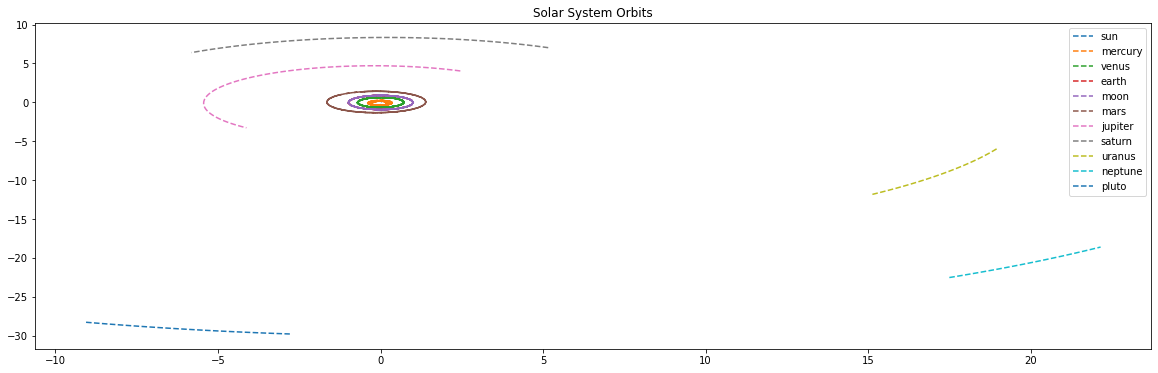

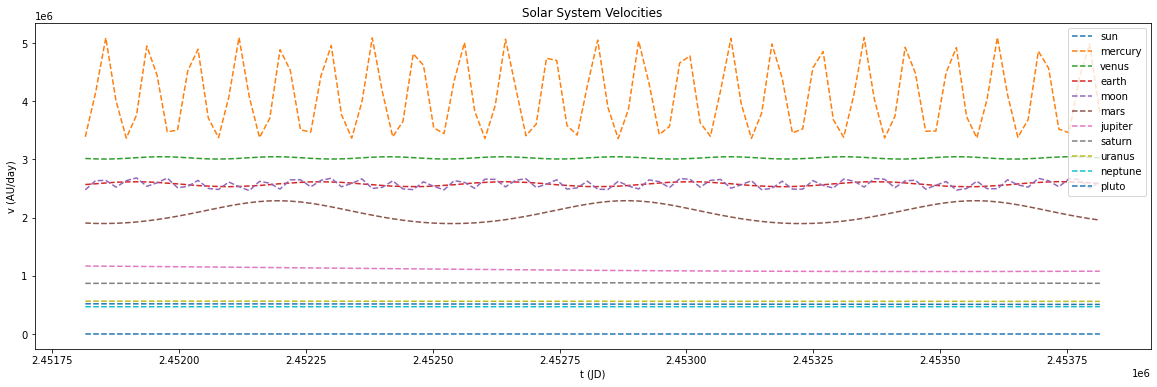

(array([[[-5.38091764e-03, -4.18843941e-03, -1.62932281e-03],
         [-5.22830040e-03, -4.27849747e-03, -1.67188588e-03],
         [-5.07273571e-03, -4.36484821e-03, -1.71295887e-03],
         ...,
         [ 3.76967906e-03,  2.28656687e-03,  8.63361601e-04],
         [ 3.70604945e-03,  2.40029380e-03,  9.12883646e-04],
         [ 3.63820629e-03,  2.51219823e-03,  9.61754569e-04]],
 
        [[-1.42100646e-03, -4.12839614e-01, -2.20325801e-01],
         [ 3.45907246e-01, -1.28622217e-01, -1.04508367e-01],
         [ 2.22599093e-02,  2.67370650e-01,  1.40603073e-01],
         ...,
         [ 3.62678456e-01, -1.97946266e-02, -4.81497079e-02],
         [-1.04527163e-01,  2.59577325e-01,  1.49512997e-01],
         [-3.83365596e-01, -1.56217744e-01, -4.36959591e-02]],
 
        [[-1.91407020e-01, -6.48485961e-01, -2.79717328e-01],
         [ 2.09256270e-01, -6.33310253e-01, -2.98239023e-01],
         [ 5.44517208e-01, -4.26020844e-01, -2.26192190e-01],
         ...,
         [-6.42915397e

In [103]:
#2D Orbits
Orbits (t_i)

D = 3
end time = 2000-09-27 07:59:39.000


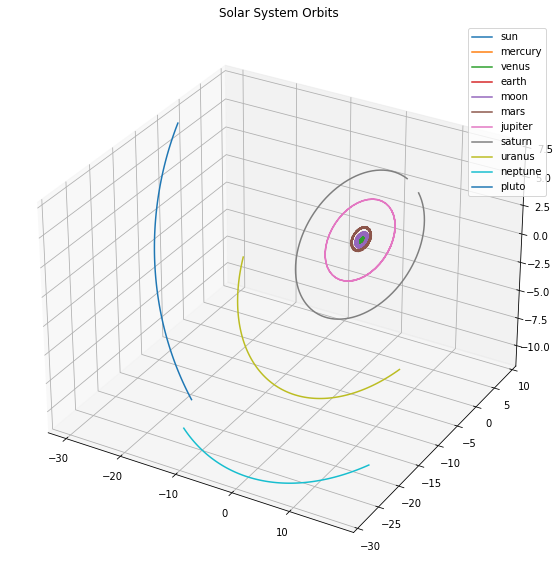

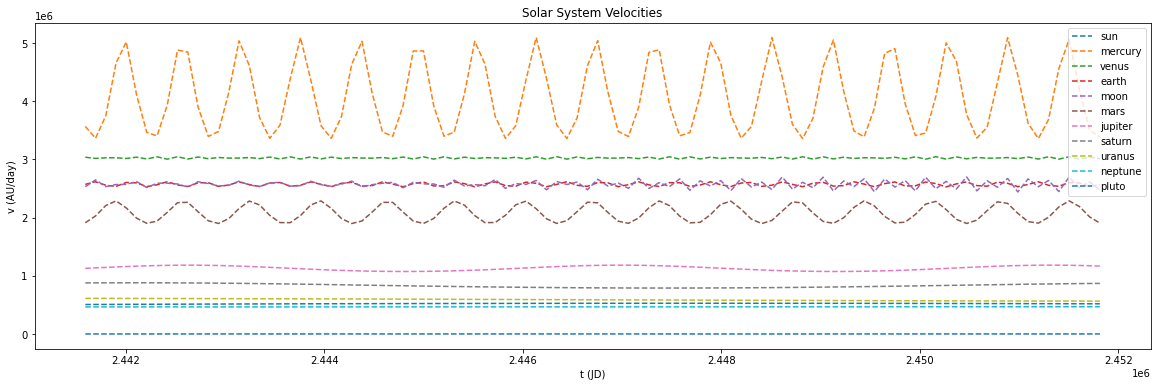

(array([[[-2.89149716e-04,  3.69038533e-03,  1.62197959e-03],
         [-8.40049958e-04,  3.45222133e-03,  1.53076495e-03],
         [-1.35582528e-03,  3.12743900e-03,  1.40131331e-03],
         ...,
         [-6.77901427e-03, -3.06061469e-03, -1.10930049e-03],
         [-6.12129431e-03, -3.67162761e-03, -1.38841631e-03],
         [-5.38191228e-03, -4.18783545e-03, -1.62903817e-03]],
 
        [[-3.36738757e-01, -2.64703803e-01, -1.06810280e-01],
         [-5.12048556e-02, -4.07253875e-01, -2.12605500e-01],
         [ 2.65352724e-01, -2.75992290e-01, -1.75362055e-01],
         ...,
         [-3.84818604e-01,  1.06775633e-02,  4.54370116e-02],
         [-3.10879096e-01, -3.09126337e-01, -1.32943179e-01],
         [-4.41072906e-03, -4.13135858e-01, -2.20174114e-01]],
 
        [[ 1.65785799e-01,  6.46946142e-01,  2.80439273e-01],
         [-3.24527459e-01, -5.95727810e-01, -2.47483000e-01],
         [ 4.87442151e-01,  4.99651677e-01,  1.93788252e-01],
         ...,
         [ 1.66300873e

In [104]:
#3d Orbits
Orbits (Time("1972-10-02 08:00"), 3, 10222)

D = 3
end time = 2003-06-24 11:11:00.000


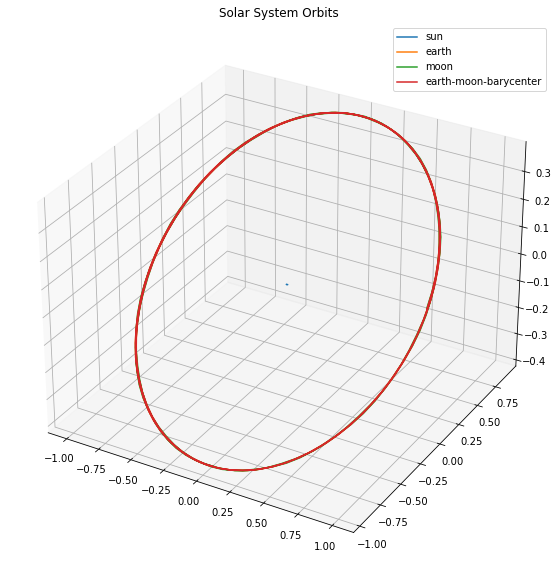

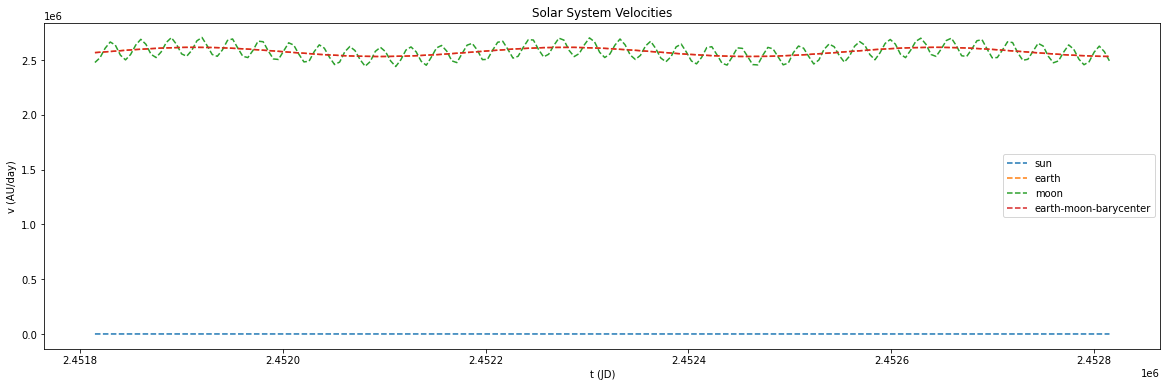

In [113]:
#SEM System
sem = ['sun','earth','moon','earth-moon-barycenter']
output1 = Orbits (t_i, 3, 1000, 200, sem) #1000days
sempos, ts = output1[0], output1[1]

se_distance = [] #sun-earth
em_distance = [] #earth-moon
sm_distance = [] #sun-moon
earth_d = [] #earth-embarycenter
moon_d = [] #moon-embarycenter

for i in range(len(ts)):
        se_distance.append(np.linalg.norm(sempos[0][i]-sempos[1][i]))
        em_distance.append(np.linalg.norm(sempos[1][i]-sempos[2][i]))
        sm_distance.append(np.linalg.norm(sempos[0][i]-sempos[2][i]))
        earth_d.append(np.linalg.norm(sempos[3][i]-sempos[1][i]))
        moon_d.append(np.linalg.norm(sempos[3][i]-sempos[2][i]))

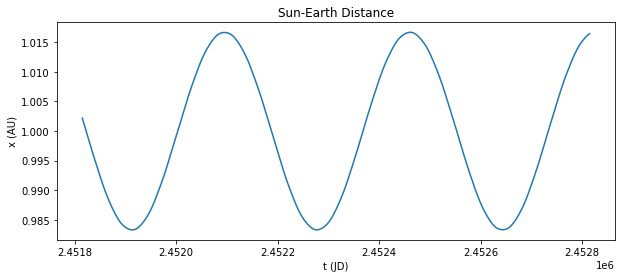

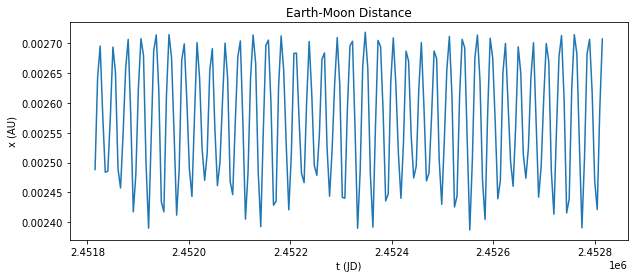

In [116]:
#Sun-Earth & Earth-Moon
plt.figure(figsize=(10,4))
plt.plot(ts.jd, se_distance)
plt.title("Sun-Earth Distance")
plt.xlabel("t (JD)")
plt.ylabel("x (AU)")

plt.figure(figsize=(10,4))
plt.plot(ts.jd, em_distance)
plt.title("Earth-Moon Distance")
plt.xlabel("t (JD)")
plt.ylabel("x (AU)")

plt.show()

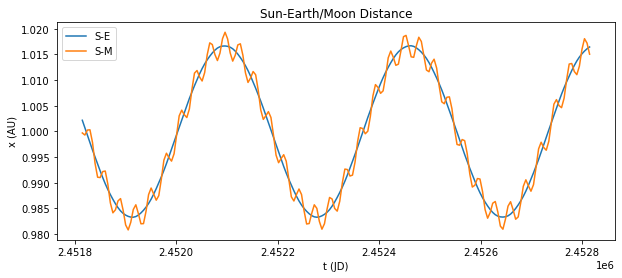

In [115]:
#Sun-Earth/Moon
plt.figure(figsize=(10,4))
plt.plot(ts.jd, se_distance, label='S-E')
plt.plot(ts.jd, sm_distance, label='S-M')
plt.title("Sun-Earth/Moon Distance")
plt.xlabel("t (JD)")
plt.ylabel("x (AU)")
plt.legend()                        
plt.show()


In [108]:
#Lagrange Points

#the NAIF IDs for these four Lagrange points are 391, 392, 394 and 395. Also note that the
#ephemerides for the L1 and L2 points are centered at the earth-moon barycenter (ID = 3)
#ephemerides for the L4 and L5 points are centered at the sun (ID = 10)."

L1 = SPK.open('L1_de431.bsp')
L2 = SPK.open('L2_de431.bsp')
L4 = SPK.open('L4_de431.bsp')
L5 = SPK.open('L5_de431.bsp')
k = SPK.open('de430.bsp')

print(L1)
print(L2)
print(L4)
print(L5)
print(k)

L1[3,391].compute(t_i.jd)

File type DAF/SPK and format LTL-IEEE with 1 segments:
2415020.50..2506696.50  Type 12  Earth Barycenter (3) -> Unknown Target (391)
File type DAF/SPK and format LTL-IEEE with 1 segments:
2415020.50..2506696.50  Type 12  Earth Barycenter (3) -> Unknown Target (392)
File type DAF/SPK and format LTL-IEEE with 1 segments:
2415020.50..2506696.50  Type 12  Sun (10) -> Unknown Target (394)
File type DAF/SPK and format LTL-IEEE with 1 segments:
2415020.50..2506696.50  Type 12  Sun (10) -> Unknown Target (395)
File type DAF/SPK and format LTL-IEEE with 14 segments:
2287184.50..2688976.50  Type 2  Solar System Barycenter (0) -> Mercury Barycenter (1)
2287184.50..2688976.50  Type 2  Solar System Barycenter (0) -> Venus Barycenter (2)
2287184.50..2688976.50  Type 2  Solar System Barycenter (0) -> Earth Barycenter (3)
2287184.50..2688976.50  Type 2  Solar System Barycenter (0) -> Mars Barycenter (4)
2287184.50..2688976.50  Type 2  Solar System Barycenter (0) -> Jupiter Barycenter (5)
2287184.50..2

ValueError: jplephem has not yet learned how to compute positions from an ephemeris segment with data type 12

In [109]:
help(spice.spiceypy)

Help on module spiceypy.spiceypy in spiceypy:

NAME
    spiceypy.spiceypy - The MIT License (MIT)

DESCRIPTION
    Copyright (c) [2015-2021] [Andrew Annex]
    
    Permission is hereby granted, free of charge, to any person obtaining a copy
    of this software and associated documentation files (the "Software"), to deal
    in the Software without restriction, including without limitation the rights
    to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
    copies of the Software, and to permit persons to whom the Software is
    furnished to do so, subject to the following conditions:
    
    The above copyright notice and this permission notice shall be included in all
    copies or substantial portions of the Software.
    
    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 

In [110]:
help(spice.spkpos)

Help on function spkpos in module spiceypy.spiceypy:

spkpos(targ: str, et: Union[float, numpy.ndarray], ref: str, abcorr: str, obs: str) -> Union[Tuple[numpy.ndarray, float], Tuple[numpy.ndarray, numpy.ndarray]]
    Return the position of a target body relative to an observing
    body, optionally corrected for light time (planetary aberration)
    and stellar aberration.
    
    https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/spkpos_c.html
    
    :param targ: Target body name.
    :param et: Observer epoch.
    :param ref: Reference frame of output position vector.
    :param abcorr: Aberration correction flag.
    :param obs: Observing body name.
    :return:
            Position of target,
            One way light time between observer and target.



In [111]:
step = 200
utc = ['Sep 27, 2000', 'Jun 24, 2003']
etOne = spice.str2et(utc[0])
etTwo = spice.str2et(utc[1])
print("ET One: {}, ET Two: {}".format(etOne, etTwo))

SpiceNOLEAPSECONDS: 
================================================================================

Toolkit version: CSPICE66

SPICE(NOLEAPSECONDS) --

The variable that points to the leapseconds (DELTET/DELTA_AT) could not be located in the kernel pool.  It is likely that the leapseconds kernel has not been loaded via the routine FURNSH.

str2et_c --> STR2ET --> TTRANS

================================================================================

In [112]:
help(spice.str2et)

Help on function str2et in module spiceypy.spiceypy:

str2et(time: Union[str, Iterable[str]]) -> Union[float, numpy.ndarray]
    Convert a string representing an epoch to a double precision
    value representing the number of TDB seconds past the J2000
    epoch corresponding to the input epoch.
    
    https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/str2et_c.html
    
    :param time: A string representing an epoch.
    :return: The equivalent value in seconds past J2000, TDB.

